
<div style="text-align:center">
    <h1><b>Tugas Besar Pengolahan Citra Digital</b></h1>
    <h1><b>FishScan: Identifikasi Ikan Berbasis Aplikasi </b></h1>
</div>
<br><br>
<br><br>
<table style="width:100%;">
    <tr>
        <td align="center" style="border:none;">
            <img src="LOGO UNRAM.png" alt="Foto" width="500" height="500">
        </td>
    </tr>
</table>
<br><br>
<br><br>
<div style="text-align:center;">
    <h2><b>Disusun Oleh:</b></h2>
    <h2>Muhamad Erwin Hariadinata   (F1D022065)</h2>
    <h2>Muhammad Nune Huria Sakti   (F1D022075)</h2>
    <h2>Nadya Azzahra               (F1D022083)</h2>
    <h2>Safira Dwirizqia            (F1D022096)</h2>
    <h2>Muhammad Akbar Setiadi      (F1D022140)</h2>
</div>
<br><br><br><br>
<div style="text-align:center">
    <h2><b>UNIVERSITAS MATARAM</b></h2>
    <h2><b>FAKULTAS TEKNIK</b></h2>
    <h2><b>TEKNIK INFORMATIKA</b></h2>
    <h2><b>2023/2024</b></h2>
</div>
<br><br><br><br>


### **Import Library**

#### **Menyediakan Library Yang Akan Digunakan**

> `import pandas as pd` : Pustaka pandas adalah pustaka yang digunakan untuk manipulasi dan analisis data tabular. Salah satu fitur utama pandas adalah DataFrame, yang merupakan struktur data berbentuk tabel dengan label pada baris dan kolom.

> `import matplotlib.pyplot as plt` : Pustaka matplotlib.pyplot adalah digunakan untuk membuat visualisasi data di Python. Pustaka ini menyediakan antarmuka seperti MATLAB untuk membuat plot, grafik, dan gambar lainnya.

> `import seaborn as sns` : Pustaka seaborn adalah pustaka visualisasi data yang dibangun di atas matplotlib. Pustaka ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.

> `import numpy as np` : Pustaka numpy adalah pustaka yang menyediakan array multidimensi (ndarray) dan berbagai fungsi untuk operasi matematika tingkat tinggi pada array tersebut.

> `import os :` Pustaka os menyediakan fungsi untuk berinteraksi dengan sistem operasi, seperti manipulasi file dan direktori.

> `import cv2 :` Pustaka OpenCV digunakan untuk pemrosesan gambar. Pustaka ini menyediakan berbagai fungsi untuk membaca, menulis, dan memanipulasi gambar.

> `import random :` Pustaka random digunakan untuk menghasilkan angka acak dan melakukan operasi acak lainnya, seperti memilih elemen acak dari sebuah list.

> `from Preprocessing import EdgeDetection, Enchantment, Morphology :` Mengimpor modul atau kelas khusus dari file Preprocessing untuk melakukan pemrosesan gambar, seperti deteksi tepi, peningkatan citra, dan morfologi.

> `from skimage.feature import graycomatrix, graycoprops :` Fungsi graycomatrix dan graycoprops dari skimage.feature digunakan untuk menghitung matriks ko-ocurrence tingkat abu-abu (GLCM) dan properti tekstur dari gambar.

> `from sklearn.model_selection import train_test_split :` Fungsi train_test_split dari scikit-learn digunakan untuk membagi dataset menjadi set pelatihan dan set pengujian.


> `from sklearn.decomposition import PCA :` Fungsi PCA dari scikit-learn digunakan untuk analisis komponen utama, yang merupakan teknik pengurangan dimensi.

> `from sklearn.preprocessing import StandardScaler :` Fungsi StandardScaler dari scikit-learn digunakan untuk menstandarisasi fitur dengan menghilangkan mean dan menskalakan ke varians satuan.

> `from sklearn.metrics import confusion_matrix :` Fungsi confusion_matrix dari scikit-learn digunakan untuk menghitung confusion matriks untuk mengevaluasi akurasi klasifikasi.

> `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score :` Fungsi-fungsi ini dari scikit-learn digunakan untuk menghitung metrik evaluasi model seperti akurasi, presisi, recall, dan skor F1.

> `from sklearn.neighbors import KNeighborsClassifier :` KNeighborsClassifier dari scikit-learn adalah algoritma klasifikasi berbasis K-Nearest Neighbors untuk melatih model dan menghitung akurasi objek yang digunakan.

> `from sklearn.ensemble import RandomForestClassifier :` RandomForestClassifier dari scikit-learn adalah algoritma klasifikasi berbasis ensambel yang menggunakan banyak pohon keputusan untuk melatih model dan menghitung akurasi objek yang digunakan.

> `from sklearn.svm import SVC :` SVC dari scikit-learn adalah algoritma klasifikasi berbasis Support Vector Machine untuk melatih model dan menghitung akurasi objek yang digunakan.

> `from sklearn.discriminant_analysis import LinearDiscriminantAnalysis :` LinearDiscriminantAnalysis dari scikit-learn adalah algoritma klasifikasi berbasis analisis diskriminan linier.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os 
import cv2
import random
from Preprocessing import EdgeDetection, Enchantment, Morphology
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### Data Loading

> `dataset_directory` digunakan untuk memanggil folder tempat dataset disimpan. Pada program ini, dataset berada di folder utama `Fish Dataset`

> `get_images_and_labels` merupakan fungsi untuk melakukan pembacaan dan pengambilan citra dalam suatu sub-folder dengan membuat variabel simpan bernama `all_images` yang digunakan untuk menyimpan semua citra yang berhasil dibaca. Lalu, `all_labels` yang digunakan untuk menyimpan label yang sesuai dengan folder tempat citra berada. Kemudian, `data_distribution` yang digunakan untuk menyimpan jumlah citra dalam setiap folder. Lalu, `folders` menyimpan daftar nama semua folder di dalam direktori dataset. yang prosesnya dilakukan dengan perulangan dan pengkondisian lalu melakukan pengembalian dari isi variabel simpan dalam bentuk array. Untuk setiap folder di dalam dataset_directory, dilakukan pengecekan apakah path tersebut adalah direktori. Jika ya, maka dilanjutkan dengan membaca semua berkas citra di dalam folder tersebut. Setiap berkas citra kemudian dibaca menggunakan OpenCV (cv2.imread) dan dikonversi dari BGR ke RGB. Citra yang berhasil dibaca ditambahkan ke all_images, sedangkan label folder ditambahkan ke all_labels. Distribusi jumlah citra per folder disimpan dalam data_distribution.

In [7]:
dataset_directory = r'Fish Dataset'

def get_images_and_labels(dataset_directory):
    all_images = []
    all_labels = []
    data_distribution = {}

    folders = os.listdir(dataset_directory)
    for folder in folders:
        folder_path = os.path.join(dataset_directory, folder)
        if os.path.isdir(folder_path):
            images = os.listdir(folder_path)
            data_distribution[folder] = len(images)
            for image_file in images:
                image_path = os.path.join(folder_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    all_images.append(image)
                    all_labels.append(folder)
    return np.array(all_images), np.array(all_labels), data_distribution

Fungsi `display_sample`: Fungsi ini menampilkan sampel citra dari sekumpulan citra dalam bentuk grid dengan jumlah baris dan kolom yang ditentukan oleh parameter rows dan cols. Citra-citra tersebut ditampilkan menggunakan matplotlib, dengan opsi untuk menambahkan label sebagai keterangan pada setiap citra jika parameter labels disediakan. Parameter cmap memungkinkan pengguna untuk menentukan peta warna yang digunakan saat menampilkan citra.

Fungsi `plot_data_distribution`: Fungsi ini membuat grafik batang yang menampilkan distribusi jumlah citra untuk setiap label menggunakan matplotlib. Parameter data_distribution adalah sebuah dictionary yang berisi jumlah citra untuk setiap label, yang kemudian digunakan untuk membuat sumbu x sebagai label dan sumbu y sebagai jumlah citra.

Fungsi `print_data_characteristic`: Fungsi ini mencetak karakteristik data ke konsol, yaitu label dan jumlah citra yang sesuai dengan setiap label. Parameter data_distribution adalah sebuah dictionary yang berisi jumlah citra untuk setiap label. Fungsi ini iterasi melalui dictionary dan mencetak setiap label beserta jumlah citra yang terkait.

In [8]:
def display_sample(images, labels, rows=1, cols=8, cmap=None):
    label_to_images = {}
    for img, label in zip(images, labels):
        if label not in label_to_images:
            label_to_images[label] = []
        label_to_images[label].append(img)

    random_images = []
    random_labels = []
    for label, imgs in label_to_images.items():
        random_image = random.choice(imgs)
        random_images.append(random_image)
        random_labels.append(label)

    plt.figure(figsize=(20, 10))
    num_images = min(len(random_images), rows * cols)
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = random_images[i]
        plt.imshow(img, cmap=cmap)
        plt.xlabel(f"ID: {random_labels[i]}")
    plt.show()

    
def plot_data_distribution(data_distribution):
    plt.figure(figsize=(15, 5))
    plt.bar(data_distribution.keys(), data_distribution.values())
    plt.xlabel('Label')
    plt.ylabel('Number of Images')
    plt.title('Data Distribution')
    plt.show()

def print_data_characteristic(data_distribution):
    print("Data Characteristics:")
    for label, count in data_distribution.items():
        print(f"Label: {label}, Number of Images: {count}")

Baris pertama memanggil fungsi `get_images_and_labels` dengan parameter dataset_directory untuk memuat semua citra dan label dari direktori dataset yang ditentukan. Fungsi ini mengembalikan tiga nilai: all_images (array dari semua citra), all_labels (array dari semua label yang sesuai), dan data_distribution (dictionary yang berisi distribusi jumlah citra per label).

Fungsi `plot_data_distribution` dipanggil dengan parameter `data_distribution` untuk membuat grafik batang yang menunjukkan distribusi jumlah citra untuk setiap label.

Fungsi `display_sample` dipanggil dengan parameter all_images dan all_labels, serta pengaturan grid dengan satu baris (rows=1) dan delapan kolom (cols=8). Fungsi ini menampilkan sampel citra dalam bentuk grid menggunakan matplotlib.

Fungsi `print_data_characteristic` dipanggil dengan parameter `data_distribution` untuk mencetak karakteristik data, yaitu label dan jumlah citra yang sesuai dengan setiap label, ke konsol.

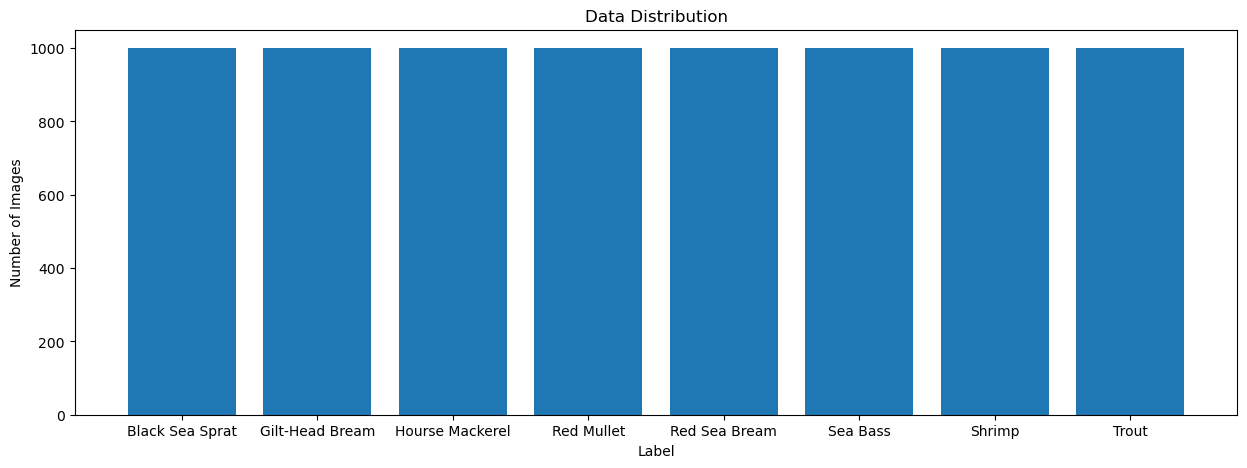

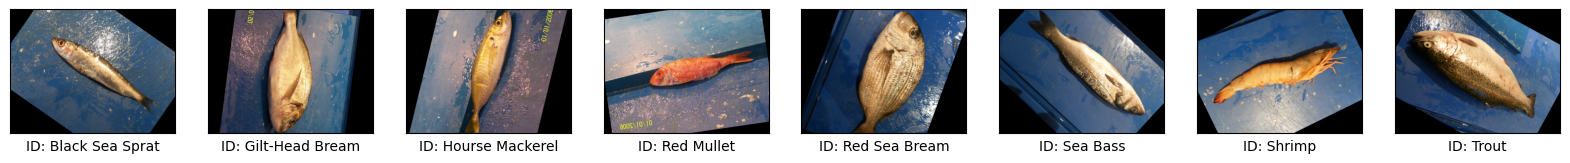

Data Characteristics:
Label: Black Sea Sprat, Number of Images: 1000
Label: Gilt-Head Bream, Number of Images: 1000
Label: Hourse Mackerel, Number of Images: 1000
Label: Red Mullet, Number of Images: 1000
Label: Red Sea Bream, Number of Images: 1000
Label: Sea Bass, Number of Images: 1000
Label: Shrimp, Number of Images: 1000
Label: Trout, Number of Images: 1000


In [9]:
all_images, all_labels, data_distribution = get_images_and_labels(dataset_directory)

plot_data_distribution(data_distribution)
display_sample(all_images, all_labels, rows=1, cols=8)
print_data_characteristic(data_distribution)

### Features Extraction

In [13]:
dict_labels ={
    'Black Sea Sprat' : 0,
    'Gilt-Head Bream' : 1,
    'Hourse Mackerel' : 2,
    'Red Mullet' : 3,
    'Red Sea Bream' : 4,
    'Sea Bass' : 5,
    'Shrimp' : 6,
    'Trout' : 7,
}

In [22]:
print(f"Total images processed: {len(all_images)}")

Total images processed: 8000


In [23]:
print(all_labels)

['Black Sea Sprat' 'Black Sea Sprat' 'Black Sea Sprat' ... 'Trout' 'Trout'
 'Trout']


Fungsi `extract_glcm_features` bertujuan mengekstraksi fitur-fitur tekstur dari citra grayscale menggunakan matriks ko-occurance tingkat abu-abu (GLCM) dan mengembalikannya dalam bentuk DataFrame. Fungsi ini menerima parameter berupa daftar citra, label, jarak antar piksel (distances), sudut (angles), jumlah level abu-abu (levels), serta parameter untuk simetri dan normalisasi. Untuk setiap citra, fungsi ini menghitung GLCM berdasarkan jarak dan sudut yang ditentukan, lalu mengekstraksi fitur-fitur tekstur seperti kontras, dissimilaritas, homogenitas, energi, dan korelasi menggunakan fungsi `graycoprops`. Selain itu, fungsi ini juga menghitung fitur tambahan seperti asm (angular second moment) dan entropi. Hasil ekstraksi fitur untuk setiap sudut disimpan dalam DataFrame `df_data`, bersama dengan label citra yang sesuai. Akhirnya, DataFrame yang berisi fitur-fitur tekstur dan label citra dikembalikan sebagai output fungsi.

In [24]:
def extract_glcm_features(images, labels, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True):
    features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    angle_labels = ['0', '45', '90', '135']
    df_data = pd.DataFrame()
    for i, image in enumerate(images):
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(int)
        glcm = graycomatrix(gray_image, distances, angles, levels, symmetric, normed)
        for feature in features:
            for angle, angle_label in zip(angles, angle_labels):
                feat_a = graycoprops(glcm, feature)[0, int(angle*4/np.pi)]
                df_data.loc[i, f'{feature}_{angle_label}'] = feat_a
        for angle, angle_label in zip(angles, angle_labels):
            asm = np.sum(glcm[:, :, 0, int(angle*4/np.pi)]**2)
            entropy = -np.sum(glcm[:, :, 0, int(angle*4/np.pi)]*np.log2(glcm[:, :, 0, int(angle*4/np.pi)] + np.finfo(float).eps))
            df_data.loc[i, f'asm_{angle_label}'] = asm
            df_data.loc[i, f'entropy_{angle_label}'] = entropy
        df_data.loc[i, 'label'] = dict_labels[labels[i]]
    return df_data

In [25]:
df_glcm = extract_glcm_features(all_images, labels=all_labels)

In [26]:
df_glcm

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135,label
0,320.211420,494.428289,394.881506,216.818079,7.480565,9.343986,8.406560,6.319972,0.338231,0.328166,...,0.970635,0.028612,10.821253,0.027471,11.016438,0.028378,10.923447,0.028190,10.701637,0.0
1,320.211420,216.818079,394.881506,494.428289,7.480565,6.319972,8.406560,9.343986,0.338231,0.340395,...,0.933036,0.028612,10.821253,0.028190,10.701637,0.028378,10.923447,0.027471,11.016438,0.0
2,439.106198,545.226231,306.754565,230.233343,8.381043,9.631732,7.186375,6.282719,0.355836,0.334976,...,0.971050,0.035785,10.676978,0.034906,10.830274,0.037009,10.565864,0.036278,10.472009,0.0
3,439.106198,230.233343,306.754565,545.226231,8.381043,6.282719,7.186375,9.631732,0.355836,0.361968,...,0.931441,0.035785,10.676978,0.036278,10.472009,0.037009,10.565864,0.034906,10.830274,0.0
4,424.876919,200.177888,378.008120,561.757691,8.514979,6.149795,7.910871,9.726471,0.335299,0.352615,...,0.933492,0.035357,10.892438,0.035702,10.640339,0.035920,10.807063,0.034428,10.997313,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,671.331174,612.113611,235.365193,561.581660,11.495262,11.164287,7.053421,10.606665,0.363364,0.361100,...,0.931151,0.051839,10.976913,0.052868,10.961087,0.058481,10.444342,0.053384,10.908889,7.0
7996,421.810226,302.323714,503.295404,627.539613,9.469329,8.175362,10.380358,11.618537,0.339558,0.354538,...,0.915636,0.029329,11.277702,0.028930,11.131833,0.029125,11.370377,0.028238,11.493236,7.0
7997,421.810226,627.539613,503.295404,302.323714,9.469329,11.618537,10.380358,8.175362,0.339558,0.320280,...,0.959357,0.029329,11.277702,0.028238,11.493236,0.029125,11.370377,0.028930,11.131833,7.0
7998,731.686857,772.349303,328.314022,497.521739,11.932327,12.390174,8.080223,9.955302,0.340685,0.333409,...,0.940063,0.040342,11.319473,0.040752,11.352164,0.045510,10.895897,0.042206,11.168295,7.0


Baris kode ini menyimpan DataFrame `df_glcm` yang berisi fitur-fitur GLCM ke dalam file CSV dengan nama 'glcm_features.csv'. Parameter index=False memastikan bahwa indeks DataFrame tidak disertakan dalam file CSV yang dihasilkan. Dengan menyimpan DataFrame ke file CSV, fitur-fitur yang telah diekstraksi dari citra dapat dengan mudah diakses dan dianalisis lebih lanjut.

In [27]:
df_glcm.to_csv('glcm_features_percobaan_0.csv', index=False)

In [28]:

df_glcm = pd.read_csv('glcm_features_percobaan_0.csv')

### Dimensionality Reduction

In [29]:
corr_glcm = pd.read_csv('glcm_features_percobaan_0.csv')

In [30]:
print(corr_glcm.head())

   contrast_0  contrast_45  contrast_90  contrast_135  dissimilarity_0  \
0  320.211420   494.428289   394.881506    216.818079         7.480565   
1  320.211420   216.818079   394.881506    494.428289         7.480565   
2  439.106198   545.226231   306.754565    230.233343         8.381043   
3  439.106198   230.233343   306.754565    545.226231         8.381043   
4  424.876919   200.177888   378.008120    561.757691         8.514979   

   dissimilarity_45  dissimilarity_90  dissimilarity_135  homogeneity_0  \
0          9.343986          8.406560           6.319972       0.338231   
1          6.319972          8.406560           9.343986       0.338231   
2          9.631732          7.186375           6.282719       0.355836   
3          6.282719          7.186375           9.631732       0.355836   
4          6.149795          7.910871           9.726471       0.335299   

   homogeneity_45  ...  correlation_135     asm_0  entropy_0    asm_45  \
0        0.328166  ...        

Blok kode ini menghitung matriks korelasi dari DataFrame `df_glcm` yang berisi fitur-fitur GLCM dan kemudian memvisualisasikannya menggunakan heatmap dari Seaborn. Matriks korelasi `corr_glcm` dihitung menggunakan metode .corr() dari pandas. Heatmap ini dibuat dengan ukuran gambar yang lebih besar (lebar 20 dan tinggi 30) untuk memastikan visibilitas yang baik dari semua fitur. Seaborn digunakan untuk menggambar heatmap dengan peta warna 'coolwarm' dan tanpa bilah warna (cbar=False). Ukuran dan rotasi label sumbu x dan y disesuaikan untuk meningkatkan keterbacaan. Label y dipecah menjadi beberapa baris untuk menghindari potongan teks, dan anotasi teks dengan nilai korelasi ditambahkan di setiap sel heatmap. Judul plot 'Correlation Matrix of GLCM Features' ditambahkan untuk memberikan konteks yang lebih baik. Akhirnya, plot ditampilkan menggunakan plt.show().

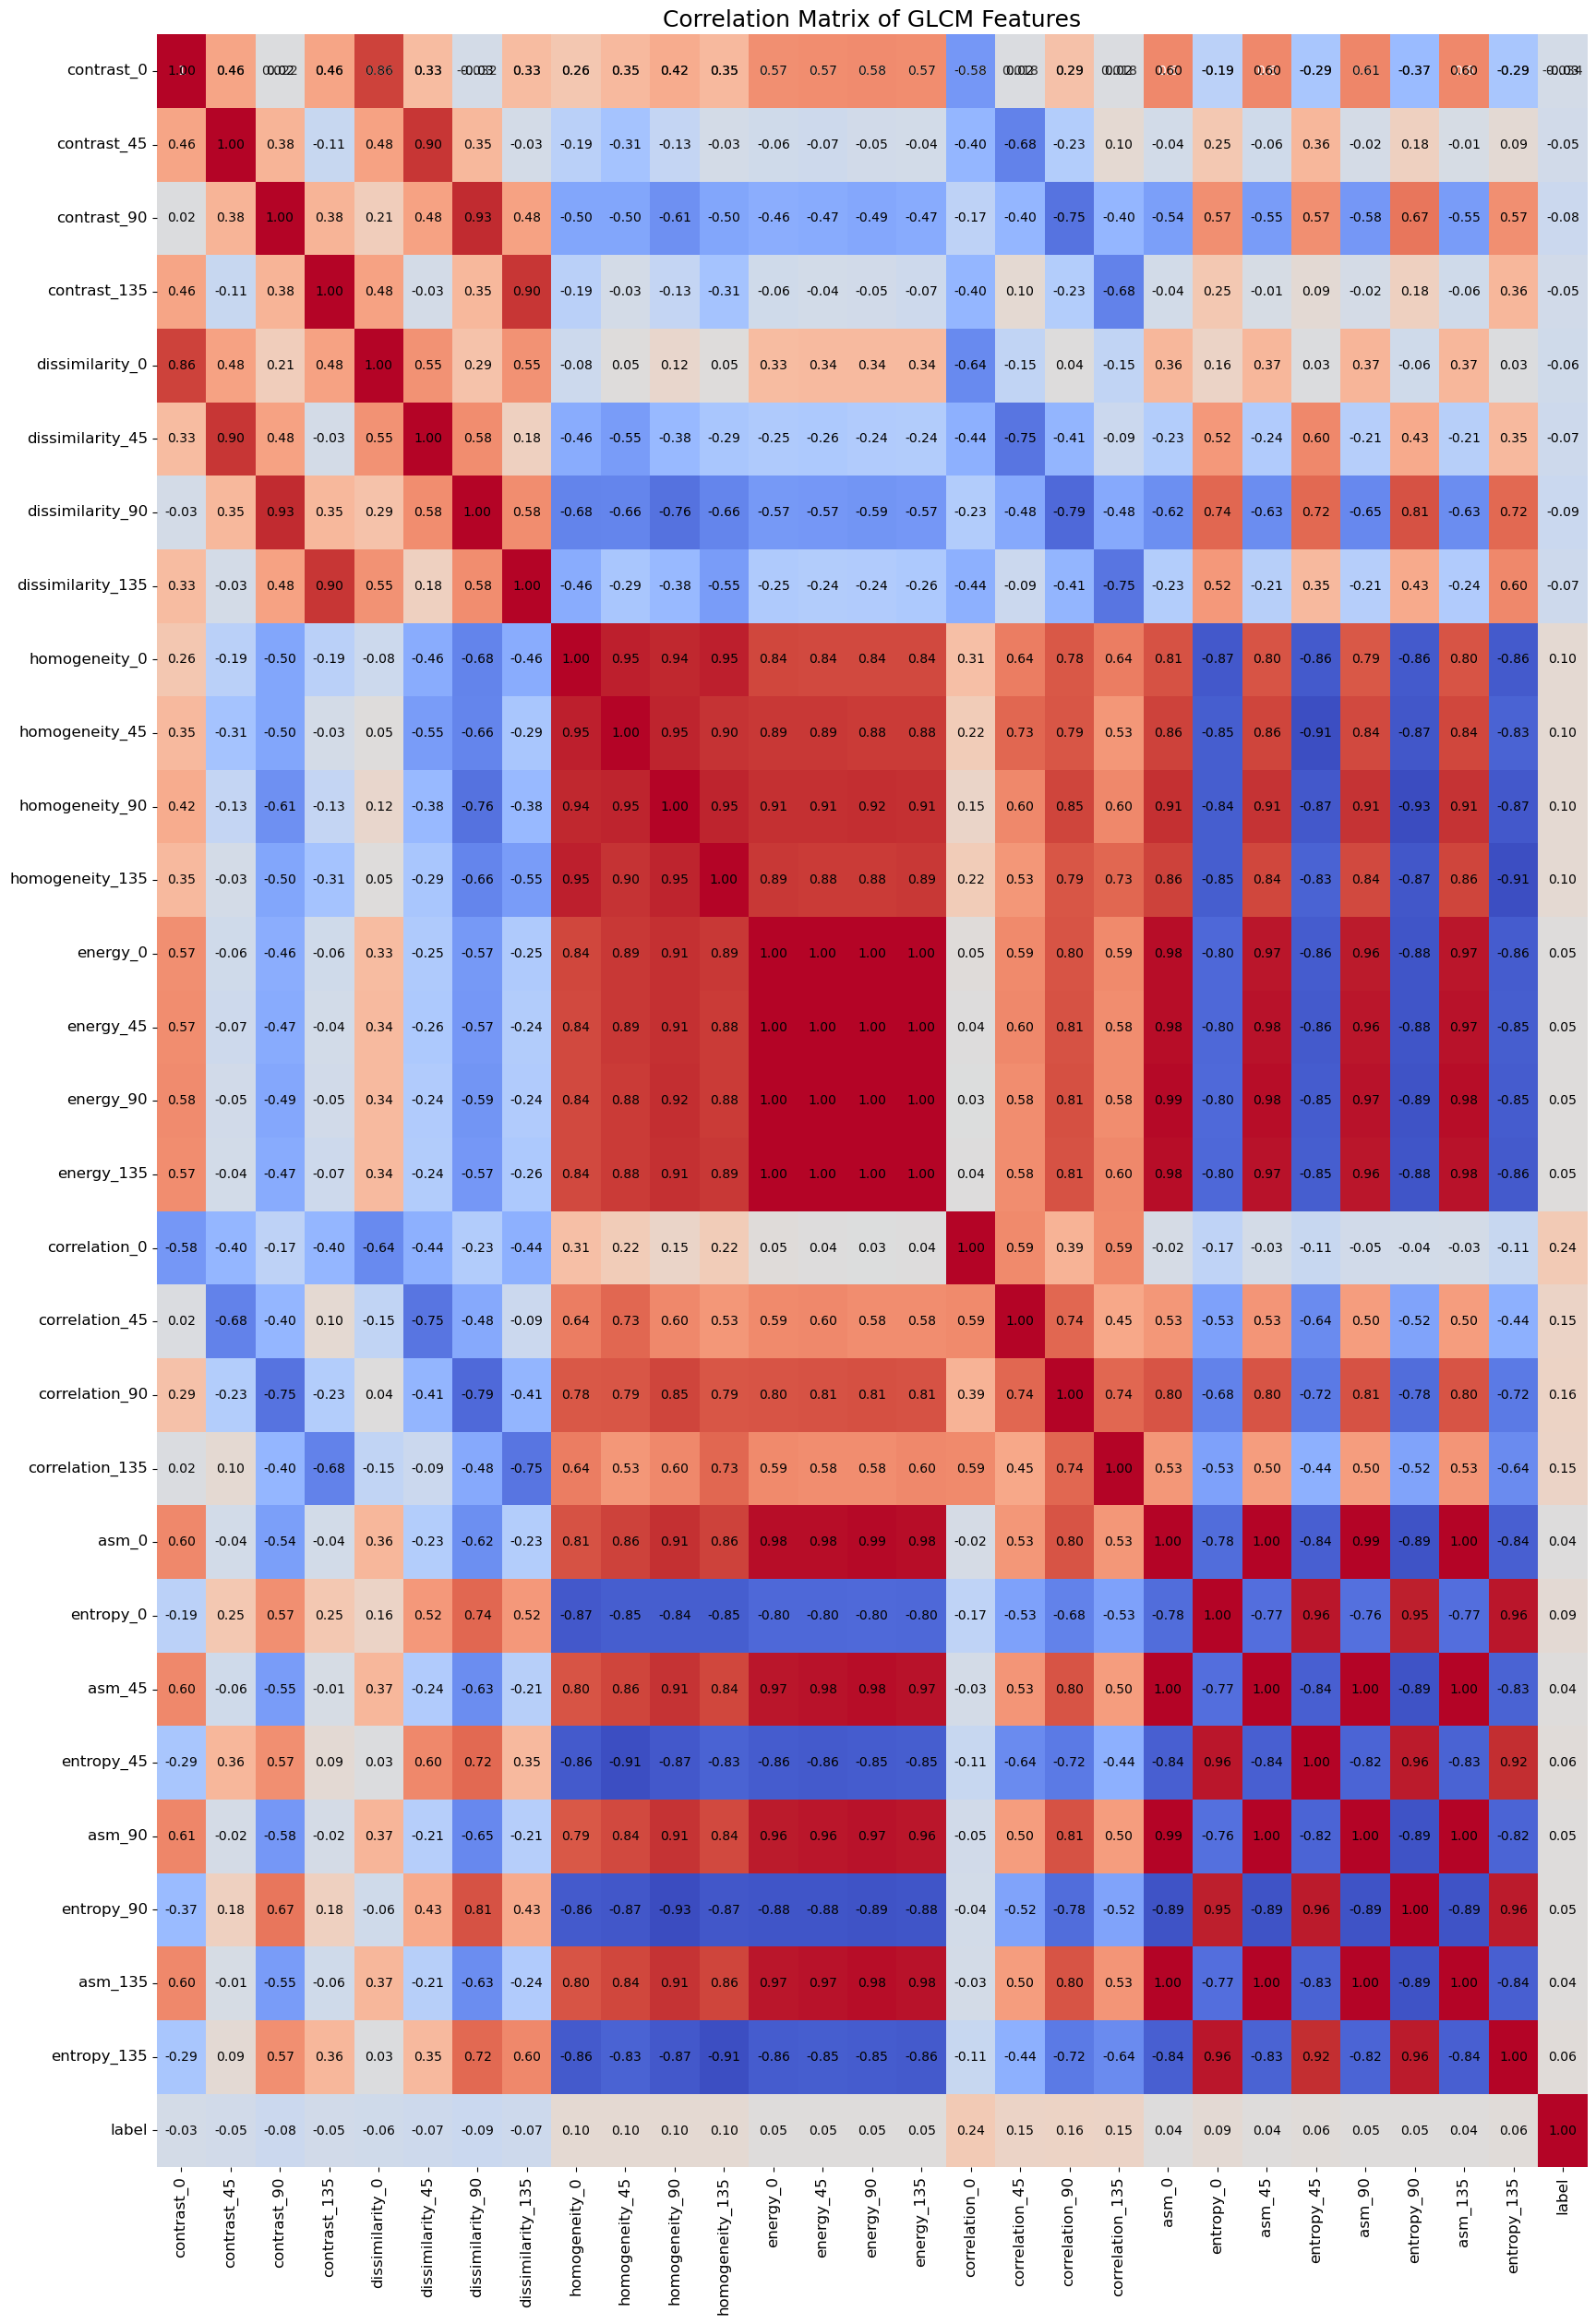

In [31]:
# Menghitung correlation matrix
corr_glcm = df_glcm.corr()

fig, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(corr_glcm, annot=True, cmap='coolwarm', cbar=False, ax=ax)

ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)

yticks = ax.get_yticklabels()
new_labels = ['\n'.join(label.get_text().split(' ')) for label in yticks]
ax.set_yticklabels(new_labels, rotation=0)

for i in range(len(corr_glcm.index)):
    for j in range(len(corr_glcm.columns)):
        ax.text(j + 0.5, i + 0.5, f'{corr_glcm.iloc[i, j]:.2f}',
                ha="center", va="center", color="black", fontsize=10)

ax.set_title('Correlation Matrix of GLCM Features', fontsize=18)

plt.show()

In [32]:
print("Shape of df_glcm:", df_glcm.shape)

Shape of df_glcm: (8000, 29)


Baris kode ini memisahkan DataFrame `df_glcm` menjadi dua bagian: `x`, yang berisi semua fitur kecuali kolom 'label', dan `y`, yang berisi hanya kolom 'label'. Ini dilakukan dengan menggunakan metode .drop('label', axis=1) untuk menghapus kolom 'label' dari `df_glcm` dan menyimpannya di `x`, sementara `y` hanya menyimpan kolom 'label' itu sendiri. Setelah pemisahan, bentuk DataFrame x diperiksa menggunakan metode .shape, dan hasilnya dicetak untuk memastikan bahwa data telah dipisahkan dengan benar dan untuk memahami dimensi dari fitur yang akan digunakan dalam analisis atau model lebih lanjut.

In [33]:
x, y = df_glcm.drop('label', axis=1), df_glcm['label']

print("Shape of x:", x.shape)

Shape of x: (8000, 28)


Blok kode ini menentukan jumlah komponen yang sesuai untuk analisis komponen utama (PCA) berdasarkan jumlah sampel dan fitur dalam data. Pertama, variabel `n_samples` dan `n_features` diatur dengan mengambil dimensi dari DataFrame x. Jumlah komponen yang digunakan dalam PCA ditentukan sebagai nilai minimum antara jumlah sampel dan jumlah fitur, disimpan dalam variabel `n_components`. Kemudian, objek PCA diinisialisasi dengan jumlah komponen yang telah ditentukan, dan transformasi PCA diterapkan pada data fitur `x` menggunakan metode `fit_transform`. Hasil transformasi PCA disimpan dalam variabel `x_pca`, dan bentuk dari data yang telah ditransformasikan diperiksa dengan memanggil `x_pca.shape`.

In [34]:
n_samples, n_features = x.shape
n_components = min(n_samples, n_features)

pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x)

x_pca.shape

(8000, 28)

Blok kode ini menginisialisasi objek PCA dengan jumlah komponen yang telah ditentukan, dalam hal ini 8 komponen, dengan `PCA(n_components=8)`. Transformasi PCA kemudian diterapkan pada data fitur `x` menggunakan metode `fit_transform`, dan hasil transformasinya disimpan dalam variabel `x_pca`. Setelah transformasi, rasio varians yang dijelaskan oleh setiap komponen utama dicetak menggunakan atribut `explained_variance_ratio_` dari objek PCA. Rasio varians yang dijelaskan ini menunjukkan proporsi total varians dalam data yang dijelaskan oleh masing-masing komponen utama, yang berguna untuk memahami pentingnya masing-masing komponen dalam representasi data yang telah direduksi.

In [35]:
pca = PCA(n_components=25)
x_pca = pca.fit_transform(x)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [4.46628473e-01 3.17202419e-01 2.09387503e-01 2.67422012e-02
 3.18053623e-05 4.03035242e-06 1.89870136e-06 1.35623686e-06
 2.39981978e-07 4.39018121e-08 8.15429162e-09 7.39205985e-09
 6.63287828e-09 3.54075456e-09 1.95272159e-09 2.64866996e-10
 1.51340984e-10 1.24427899e-10 9.92115166e-11 8.06222567e-11
 3.10721608e-11 2.11723645e-11 1.43691162e-11 1.43184314e-11
 3.41032708e-12]


### Splitting Data

Baris kode ini membagi data yang telah ditransformasikan menggunakan PCA `x_pca` dan label `y` menjadi set pelatihan dan pengujian menggunakan fungsi `train_test_split` dari scikit-learn. Parameter `test_size=0.2` menentukan bahwa 20% dari data akan digunakan sebagai set pengujian, sementara 80% sisanya digunakan sebagai set pelatihan. Parameter `random_state=42` memastikan bahwa pembagian data konsisten dan dapat direproduksi. Data hasil pembagian disimpan dalam variabel `x_train`, `x_test`, `y_train`, dan `y_test`. Setelah pembagian, bentuk dari setiap set diperiksa dengan memanggil metode .shape pada masing-masing variabel untuk memastikan bahwa data telah dibagi dengan benar dan untuk memahami dimensi dari setiap set.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6400, 25), (1600, 25), (6400,), (1600,))

### Normalization

Baris kode ini melakukan normalisasi fitur pada set pelatihan dan pengujian menggunakan `StandardScaler()` dari scikit-learn. Pertama, objek `StandardScaler` diinisialisasi dengan `scaler = StandardScaler()`. Kemudian, data fitur pada set pelatihan `x_train` di-skalakan menggunakan metode `fit_transform`, yang menyesuaikan skala dengan menghitung rata-rata dan standar deviasi dari set pelatihan serta menerapkan transformasi ini pada data. Data fitur pada set pengujian `x_test` di-skalakan menggunakan metode transform, yang menerapkan skala yang sama (rata-rata dan standar deviasi) yang diperoleh dari set pelatihan. Normalisasi ini memastikan bahwa semua fitur memiliki rata-rata nol dan standar deviasi satu.

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Modeling

### KNN Classifier

Baris kode ini menggunakan algoritma K-Nearest Neighbors (KNN) untuk melakukan klasifikasi. Objek KNN diinisialisasi dengan `KNeighborsClassifier(n_neighbors=1, metric='cosine')`, di mana `n_neighbors=1` menunjukkan bahwa model KNN menggunakan tetangga terdekat tunggal untuk klasifikasi, dan `metric='cosine'` menunjukkan bahwa jarak kosinus digunakan sebagai metrik jarak antara data.

Setelah inisialisasi, model KNN dilatih dengan menggunakan data pelatihan (`x_train dan y_train`) menggunakan metode fit. Setelah pelatihan, model digunakan untuk membuat prediksi pada data pengujian (`x_test`) dengan memanggil metode predict, dan hasil prediksi disimpan dalam variabel `y_pred`. Akurasi dari prediksi tersebut kemudian dicetak dengan menggunakan fungsi `accuracy_score` dari scikit-learn, yang membandingkan nilai prediksi (`y_pred`) dengan nilai sebenarnya (`y_test`) dari data pengujian.

In [38]:
knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.97


### SVM Classifier

Baris kode ini menggunakan algoritma Support Vector Machine (SVM) untuk melakukan klasifikasi. Objek SVM diinisialisasi dengan `SVC(kernel='rbf', C=30, gamma='auto')`, di mana `kernel='rbf'` menunjukkan penggunaan kernel Radial Basis Function (RBF) untuk memisahkan kelas data, `C=30` adalah parameter yang mengontrol penalti kesalahan klasifikasi, dan `gamma='auto'` menentukan nilai gamma yang dihitung secara otomatis berdasarkan 1 / jumlah fitur. Setelah inisialisasi, model SVM dilatih dengan menggunakan data pelatihan (`x_train dan y_train`) menggunakan metode fit.

Setelah pelatihan, model digunakan untuk membuat prediksi pada data pengujian (`x_test`) dengan memanggil metode predict, dan hasil prediksi disimpan dalam variabel `y_pred`. Akurasi dari prediksi tersebut kemudian dicetak dengan menggunakan fungsi `accuracy_score` dari scikit-learn, yang membandingkan nilai prediksi (`y_pred`) dengan nilai sebenarnya (`y_test`) dari data pengujian.

In [39]:
svm = SVC(kernel='rbf', C=30, gamma='auto')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9875


### Random Forest Classifier

Baris kode ini menggunakan algoritma Random Forest untuk melakukan klasifikasi. Objek RandomForestClassifier diinisialisasi dengan `RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, max_depth=50, min_samples_leaf=1, min_samples_split=2, bootstrap=False, criterion='gini')`. Parameter `n_estimators=500` menunjukkan bahwa terdapat 500 pohon keputusan yang digunakan dalam model, `class_weight='balanced'` memberikan bobot kelas yang seimbang untuk mengatasi ketimpangan kelas dalam data, `n_jobs=-1` mengizinkan penggunaan semua core CPU untuk mempercepat pelatihan model, `max_depth=50` menetapkan kedalaman maksimum dari setiap pohon keputusan, `min_samples_leaf=1` dan `min_samples_split=2` menetapkan jumlah minimum sampel yang diperlukan untuk membagi node dan menjaga daun, `bootstrap=False` memastikan bahwa tidak ada pengambilan sampel acak dari data pelatihan saat membangun pohon, dan `criterion='gini'` menentukan bahwa kriteria untuk mengukur kualitas pemisahan adalah indeks Gini.

Setelah inisialisasi, model Random Forest dilatih menggunakan data pelatihan (`x_train dan y_train`) dengan memanggil metode fit. Setelah pelatihan, model digunakan untuk membuat prediksi pada data pengujian (`x_test`) dengan memanggil metode predict, dan hasil prediksi disimpan dalam variabel `y_pred`. Akurasi dari prediksi tersebut kemudian dicetak menggunakan fungsi `accuracy_score` dari scikit-learn, yang membandingkan nilai prediksi (`y_pred`) dengan nilai sebenarnya (`y_test`) dari data pengujian.

In [40]:
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, max_depth=50, min_samples_leaf=1, min_samples_split=2, bootstrap=False, criterion='gini')
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.99125


## Evaluation

Baris kode ini membuat sebuah dataframe yang berisi beberapa model klasifikasi yang telah dilatih sebelumnya, yaitu K-Nearest Neighbors (KNN), Support Vector Machine (SVM), dan Random Forest (RF), yang masing-masing disimpan dengan nama `knn`, `svm`, dan `rfc`. Kamus ini diberi nama `model_dict`. Selanjutnya, sebuah DataFrame evaluasi (`df_eval`) dibuat menggunakan Pandas dengan kolom-kolom yang telah ditentukan, yaitu 'Accuracy', 'Precision', 'Recall', dan 'F1 Score'. Indeks dari DataFrame ini diambil dari kunci-kunci (nama-nama) yang ada dalam model_dict, yaitu 'KNN', 'SVM', dan 'RF'. DataFrame ini akan digunakan untuk menyimpan metrik evaluasi kinerja dari masing-masing model setelah evaluasi dilakukan.

In [41]:
model_dict = {
    'KNN': knn,
    'SVM': svm,
    'RF': rfc
}
df_eval = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=model_dict.keys())


Blok kode ini menggunakan sebuah loop for untuk iterasi melalui setiap model dalam `model_dict`. Pada setiap iterasi, model tersebut digunakan untuk membuat prediksi pada data pengujian (`x_test`) dengan memanggil metode predict. Hasil prediksi disimpan dalam variabel `y_pred`. Selanjutnya, nilai akurasi, presisi, recall, dan F1-score dari prediksi tersebut dihitung menggunakan fungsi-fungsi evaluasi dari scikit-learn (`accuracy_score`, `precision_score`, `recall_score`, `f1_score`) dengan menggunakan parameter `average='weighted'` untuk menangani multiclass classification. Hasil evaluasi ini kemudian dimasukkan ke dalam DataFrame `df_eval` pada baris yang sesuai dengan nama model (`model_name`). Proses ini berulang untuk setiap model dalam dataframe `model_dict`, sehingga DataFrame `df_eval` akan berisi metrik evaluasi kinerja dari semua model setelah iterasi selesai.

In [42]:
for model_name, model in model_dict.items():
    y_pred = model.predict(x_test)
    df_eval.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
    df_eval.loc[model_name, 'Precision'] = precision_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'Recall'] = recall_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

In [43]:
df_eval

,Accuracy,Precision,Recall,F1 Score
KNN,0.97,0.970197,0.97,0.969974
SVM,0.9875,0.987684,0.9875,0.987534
RF,0.99125,0.991355,0.99125,0.991241


Blok kode ini membuat sebuah plot dengan Matplotlib untuk menampilkan Confusion Matriks. Confusion Matrix antara nilai prediksi (`y_pred`) dan nilai sebenarnya (`y_test`) dihitung menggunakan `confusion_matrix` dari scikit-learn. Matriks ini kemudian ditampilkan menggunakan `sns.heatmap` untuk visualisasi yang lebih baik. Parameter `annot=True` digunakan untuk menampilkan nilai di dalam sel heatmap, `cmap='coolwarm'` digunakan untuk memilih skema warna heatmap, dan `cbar=False` digunakan untuk menghilangkan bar warna yang ada di sebelah kanan. Setiap subplot diberi label sumbu x dan y sesuai dengan "Predicted" (prediksi) dan "True" (nilai sebenarnya), serta diberi judul sesuai dengan nama model (`model_name`). Subplot ini kemudian ditampilkan dalam satu gambar (fig) menggunakan plt.show().

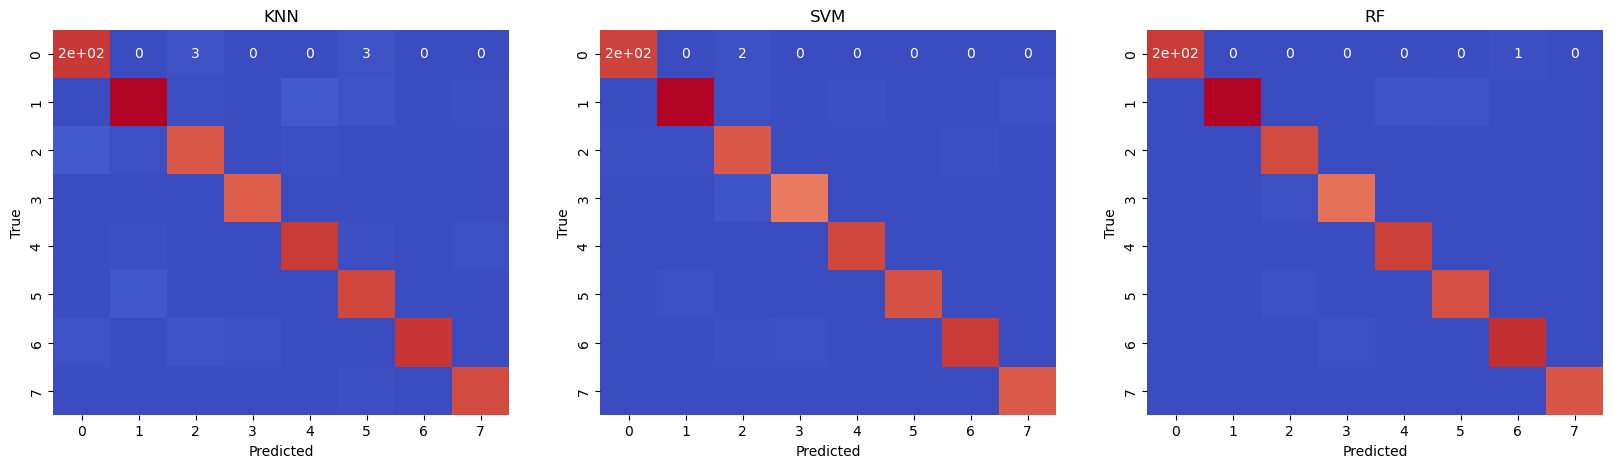

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i, model_name in enumerate(model_dict.keys()):
    y_pred = model_dict[model_name].predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False, ax=ax[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('True')
    ax[i].set_title(model_name)
plt.show()